#  Objective:

- In this Notebook i am going to make some predictions over the Stock Market Data.
- Target: 'RELIENCE.BO'

In [0]:
# Pandas Mmodeule for data manipulation and analysis
import pandas as pd

#To extract data from a wide range of internet Source
import pandas_datareader.data as web

# Date and Time related module
import datetime
from datetime import timedelta, datetime, date

#basic tools to compute with and manipulate arrays
import numpy as np

# Importing all the necessary models for predictions
from sklearn.linear_model import Ridge, Lasso,  BayesianRidge, ElasticNet

In [0]:
# Historical starting date of "RELIANCE.BO" in stock market
start = date(year=1995, month=10, day=7)

#Todays Date
end = date.today()

In [0]:
# Storing all the data in a pandas DataFrame
df = web.DataReader("RELIANCE.BO", 'yahoo', start, end)

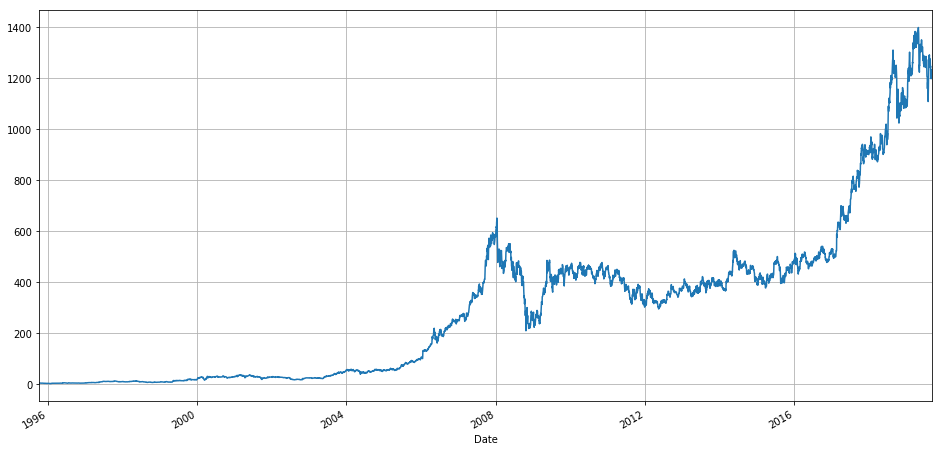

In [4]:
# 'Adj Close' is the Target column which we will predict furthur
df['Adj Close'].plot(label='RELIANCE.BO', figsize=(16,8), grid=True)

In [5]:
# Creating window size of 32 so that we can predict the 33rd day stock
window_size = 32
num_samples=len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)
indices

array([[   0,    1,    2, ...,   30,   31,   32],
       [   1,    2,    3, ...,   31,   32,   33],
       [   2,    3,    4, ...,   32,   33,   34],
       ...,
       [5889, 5890, 5891, ..., 5919, 5920, 5921],
       [5890, 5891, 5892, ..., 5920, 5921, 5922],
       [5891, 5892, 5893, ..., 5921, 5922, 5923]])

In [6]:
data = df['Adj Close'].values[indices]
data

array([[   4.97527552,    4.88673162,    4.9044466 , ...,    3.70047235,
           3.5535171 ,    3.78899693],
       [   4.88673162,    4.9044466 ,    4.8424778 , ...,    3.5535171 ,
           3.78899693,    4.07670689],
       [   4.9044466 ,    4.8424778 ,    4.86017513, ...,    3.78899693,
           4.07670689,    4.06696892],
       ...,
       [1251.86914062, 1225.51513672, 1207.4152832 , ..., 1222.09997559,
        1234.09997559, 1210.34997559],
       [1225.51513672, 1207.4152832 , 1204.48156738, ..., 1234.09997559,
        1210.34997559, 1225.55004883],
       [1207.4152832 , 1204.48156738, 1174.05004883, ..., 1210.34997559,
        1225.55004883, 1210.80004883]])

In [0]:
#Features
X = data[:,:-1]
#Targets
y = data[:,-1]

In [0]:
# Splitting the DataFrame for Training and Testing.

#Training Data is stored with 80% of the toatal Data
TrainSplit = 0.8
ind_split= int(TrainSplit * num_samples)

X_train = X[:ind_split]
X_test = X[ind_split:]
y_train = y[:ind_split]
y_test = y[ind_split:]

In [9]:
#  Lasso Regressor
reg_1 = Lasso()
reg_1.fit(X_train, y_train)
print("Lasso Score:", reg_1.score(X_test, y_test))

# Ridge Regressor
reg_2 = Ridge()
reg_2.fit(X_train, y_train)
print("Ridge Score:", reg_2.score(X_test, y_test))

# Bayesian Ridge Regressor
reg_3 = BayesianRidge()
reg_3.fit(X_train, y_train)
print("BayesianRidge Score:", reg_3.score(X_test, y_test))

# ElasticNet Regresor
reg_4 = ElasticNet()
reg_4.fit(X_train, y_train)
print("ElasticNet Score:", reg_4.score(X_test, y_test))

Lasso Score: 0.9964436363983861
Ridge Score: 0.9981550506815655
BayesianRidge Score: 0.9981535495945764
ElasticNet Score: 0.9964004329757494


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130579.89220603682, tolerance: 16369.86683010428
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129894.39265817839, tolerance: 16369.86683010428
  positive)


In [0]:
#Let us predict the stock market for the Future 30 days
days = 20

data_seed = df['Adj Close'].values[-window_size:][None]

input_values = {'Lasso': data_seed, 'Ridge': data_seed, 'BayesianRidge': data_seed, 'ElasticNet': data_seed}
values = {'Lasso': [], 'Ridge': [], 'BayesianRidge': [], 'ElasticNet': []}

for i in range(days):
  values['Lasso'].append(reg_1.predict(input_values['Lasso'])[0])
  values['Ridge'].append(reg_2.predict(input_values['Ridge'])[0])
  values['BayesianRidge'].append(reg_3.predict(input_values['BayesianRidge'])[0])
  values['ElasticNet'].append(reg_4.predict(input_values['ElasticNet'])[0])

  for v in input_values:
    val = input_values[v]
    val = np.insert(val, -1, values[v][-1], axis=1)
    val = np.delete(val, 0, axis=1)
    input_values[v] = val.copy()
for v in input_values:
    values[v] = np.array(values[v])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8e756bdd8>,
      dtype=object)

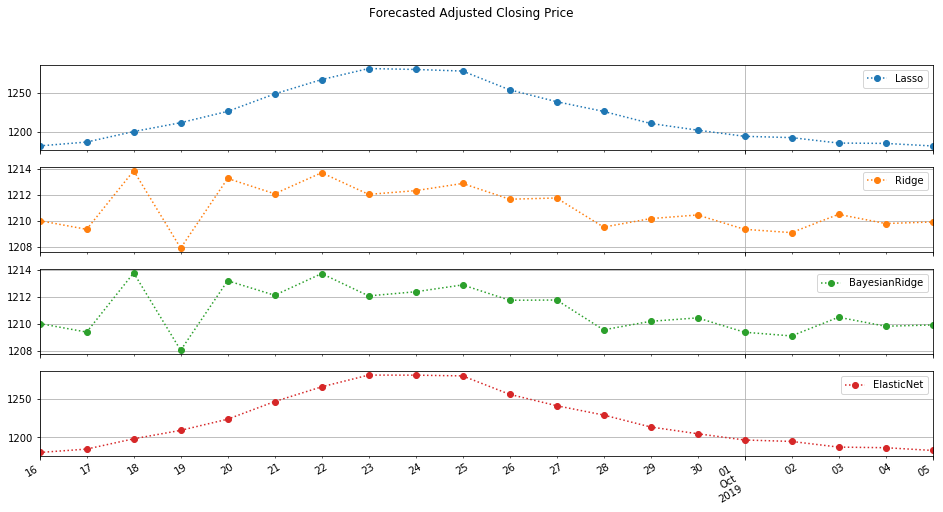

In [11]:
# Plotting the Predictions of all the four Regressors in sub plots
last_date = datetime.strptime("{:%Y-%m-%d}".format(df.index[-1]),'%Y-%m-%d')
df_forecast = pd.DataFrame()
df_forecast['Lasso'] = values['Lasso']
df_forecast['Ridge'] = values['Ridge']
df_forecast['BayesianRidge'] = values['BayesianRidge']
df_forecast['ElasticNet'] = values['ElasticNet']
df_forecast.index = pd.date_range(start=last_date, periods=days)
df_forecast.plot(label='RELIANCE.BO',figsize=(16,8), title='Forecasted Adjusted Closing Price', grid=True, marker='o',linestyle=':',subplots=True)

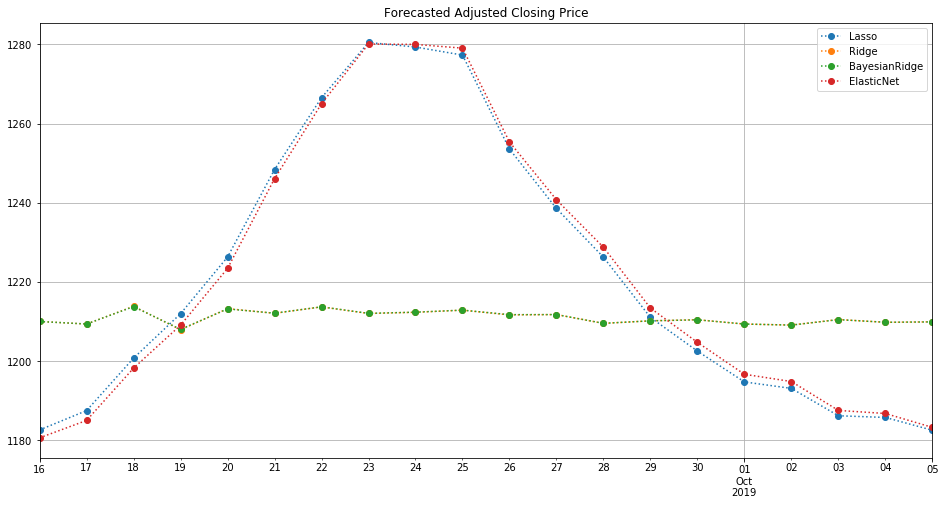

In [12]:
# Plotting the Predictions of all the four Regressors in a single plot.
df_forecast.plot(label='RELIANCE.BO',figsize=(16,8), title='Forecasted Adjusted Closing Price', grid=True, marker='o',linestyle=':')

In [13]:
df_forecast

,Lasso,Ridge,BayesianRidge,ElasticNet
2019-09-16,1182.619030,1210.026906,1210.016841,1180.624443
2019-09-17,1187.501879,1209.364332,1209.384041,1185.016739
2019-09-18,1200.756252,1213.853905,1213.770162,1198.226415
2019-09-19,1211.980122,1207.924322,1208.033559,1209.082638
2019-09-20,1226.294308,1213.263205,1213.188132,1223.418554
2019-09-21,1248.396010,1212.088602,1212.113036,1246.085659
2019-09-22,1266.540358,1213.701290,1213.720078,1265.025270
2019-09-23,1280.499435,1212.041858,1212.066868,1280.112625
2019-09-24,1279.352972,1212.328319,1212.372494,1280.008919
2019-09-25,1277.319615,1212.878727,1212.880797,1279.074314
